In [1]:
import pandas as pd
import numpy as np
import sklearn as ak
import matplotlib.pyplot as plt
import prince
import seaborn as sns
import utils
from dython.nominal import associations
import visuals
import random

In [39]:
dfs= pd.read_csv('segmentos.csv')

dffp= pd.read_csv('DispuestoPagar2.csv')
dfs['DispuestoPagar']= dffp['DispuestoPagar']


dfc= pd.read_csv('coaching.csv',sep=';')
#['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7']
dfs['coaching'] = dfc['coaching']
#dfp2= pd.read_csv('pagado3.csv')
#dfs['Pagado']= dffp2['Pagado']


df = dfs.copy()
display(df)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,Segment,DispuestoPagar,coaching
0,0,3.211987,6.368145e+05,1.277260,1.024315,95.724698,36.049953,1.024319,1.209823,4.440572,...,3.725901,7.495038,1.209823,1640.869735,752.524379,1.656503,0.980900,1,Entre 10-40,pensado
1,1,419068.183484,2.238361e+00,1.028124,1.570385,172335.871093,0.802015,1.570407,1.004447,1.541562,...,2.220876,11.644916,1.004447,5.563909,183153.026669,0.920493,0.966706,0,Entre 10-40,Si de forma puntual
2,2,0.186023,4.947293e+06,1.322078,0.924889,12.067701,69.238111,0.924889,1.247761,5.149165,...,3.850088,5.897361,1.247761,3789.460492,132.121152,1.838169,0.985551,1,Entre 10-40,los uso con frecuencia
3,3,0.296836,6.254851e+05,1.273780,0.942554,10.778238,38.893308,0.942554,1.211090,4.159506,...,3.256705,4.856045,1.211090,1284.721300,85.493721,1.690405,0.986872,1,Entre 10-40,los uso con frecuencia
4,4,24258.492111,1.738618e+01,1.064196,1.417930,21714.944852,1.540310,1.417946,1.035942,1.787493,...,2.294796,9.161583,1.035942,12.847485,32139.339777,1.021440,0.971292,0,Entre 10-40,no me lo he planteado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,64,23.413098,2.483002e+04,1.206345,1.102407,252.411760,13.979714,1.102412,1.153719,3.284834,...,3.073041,6.935019,1.153719,340.234828,1189.461061,1.436504,0.979839,1,NaN,Si de forma puntual
65,65,418506.406439,2.237232e+00,1.028113,1.570313,172101.763554,0.801941,1.570335,1.004440,1.541422,...,2.220605,11.641294,1.004440,5.561643,182891.163972,0.920486,0.966710,0,NaN,no me lo he planteado
66,66,0.072349,1.051662e+06,1.284069,0.896607,3.392445,46.975647,0.896606,1.221065,4.239952,...,3.159882,4.032860,1.221065,1483.869407,29.365271,1.746144,0.989788,1,NaN,NaN
67,67,2.097897,2.006306e+04,1.198749,1.013565,26.253704,14.319555,1.013568,1.151727,3.009528,...,2.632905,4.351990,1.151727,238.756440,121.134959,1.455314,0.986117,1,NaN,Si de forma puntual


# computo los valores perdidos de dispuesto a pagar

In [40]:
valueCounts = {}
def CountAll():
    global all_columns, nanCounts, valueCounts
    all_columns = list(df)
    nanCounts = df.isnull().sum()
    for x in all_columns:
        valueCounts[x] = df[x].value_counts()        
"""-------------------------------------------------------------------------"""

def Fill_NaNs_Categorical(col):     
    """Calculating probability and expected value."""
    proportion = np.array(valueCounts[col].values) / valueCounts[col].sum() * nanCounts[col]
    proportion = np.around(proportion).astype('int')
    
    """Adjusting proportion."""
    diff = int(nanCounts[col] - np.sum(proportion))
    if diff > 0:
        for x in range(diff):
            idx = random.randint(0, len(proportion) - 1)
            proportion[idx] =  proportion[idx] + 1
    else:
        diff = -diff
        while(diff != 0):
            idx = random.randint(0, len(proportion) - 1)
            if proportion[idx] > 0:
                proportion[idx] =  proportion[idx] - 1
                diff = diff - 1
        
    """Filling NaNs."""
    nan_indexes = df[df[col].isnull()].index.tolist() 
    for x in range(len(proportion)):
        if proportion[x] > 0:
            random_subset = random.sample(population = nan_indexes, k = proportion[x])
            df.loc[random_subset, col] = valueCounts[col].keys()[x]
            nan_indexes = list(set(nan_indexes) - set(random_subset))

In [42]:
#relleno los valores faltantes con el método
CountAll()
Fill_NaNs_Categorical('DispuestoPagar')
df['DispuestoPagar'].isnull().sum() #<- total de valores perdidos en la columna, da cero
Fill_NaNs_Categorical('coaching')
df['coaching'].isnull().sum() 

0

# Filtro las columnas que me interesan

In [43]:
int_col = ['Segment','DispuestoPagar','coaching']
display(df[int_col])

,Segment,DispuestoPagar,coaching
0,1,Entre 10-40,pensado
1,0,Entre 10-40,Si de forma puntual
2,1,Entre 10-40,los uso con frecuencia
3,1,Entre 10-40,los uso con frecuencia
4,0,Entre 10-40,no me lo he planteado
...,...,...,...
64,1,Entre 10-40,Si de forma puntual
65,0,Entre 10-40,no me lo he planteado
66,1,Entre 10-40,Si de forma puntual
67,1,Entre 10-40,Si de forma puntual


# Exploración y Análisis Análisis de los datos.

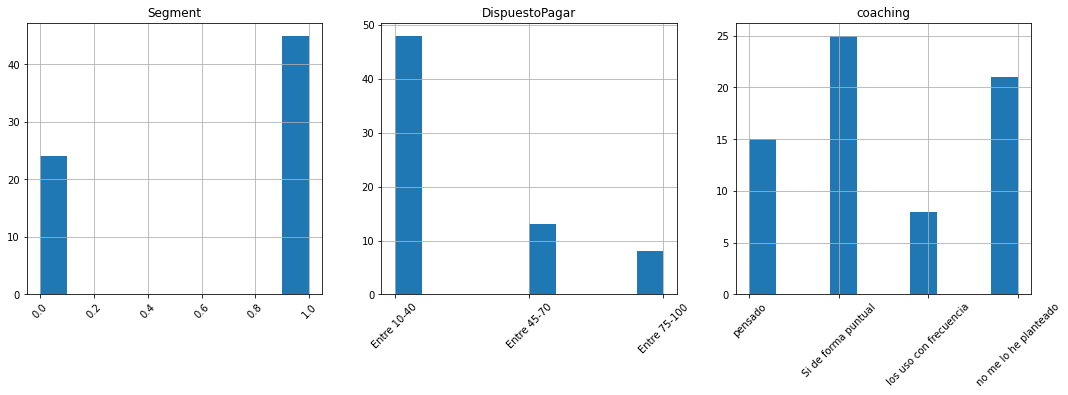

In [44]:

plt.subplots(figsize=(15,10))
plt.figure(1)

ax1=plt.subplot(1,3,1)
plt.xticks(rotation=45)
ax1.set_title('Segment')
df['Segment'].hist (figsize=(18,5))

ax1=plt.subplot(1,3,2)
plt.xticks(rotation=45)
ax1.set_title('DispuestoPagar')
df['DispuestoPagar'].hist(figsize=(18,5))

ax1=plt.subplot(1,3,3)
plt.xticks(rotation=45)
ax1.set_title('coaching')
df['coaching'].hist(figsize=(18,5))

# ¿Cuánto estan dispuesto a pagar por segmento?

In [36]:
def  plot_info(key):
    plt.figure(figsize=(8,6))
    if key=='DispuestoPagar':
        values = ['Entre 10-40', 'Entre 45-70', 'Entre 75-100']

    if key=='coaching':
        values = ['Si de forma puntual', 'no me lo he planteado', 'pensado','los uso con frecuencia']

    

    frame = pd.DataFrame(index = np.arange(len(values)), columns=(key,'Seg0','Seg1'))
    for i, value in enumerate(values):
        frame.loc[i] = [value, \
        len(df[int_col][(df[int_col]['Segment'] == 0) & (df[int_col][key] == value)]), \
        len(df[int_col][(df[int_col]['Segment'] == 1) & (df[int_col][key] == value)])]

    bar_width = 0.4
    for i in np.arange(len(frame)):
                nonsurv_bar = plt.bar(i-bar_width, frame.loc[i]['Seg0'], width = bar_width, color = 'r')
                surv_bar = plt.bar(i, frame.loc[i]['Seg1'], width = bar_width, color = 'g')

                plt.xticks(np.arange(len(frame)), values)
                plt.legend((nonsurv_bar[0], surv_bar[0]),('Segemto 0', 'Segmento 1'), framealpha = 0.8)




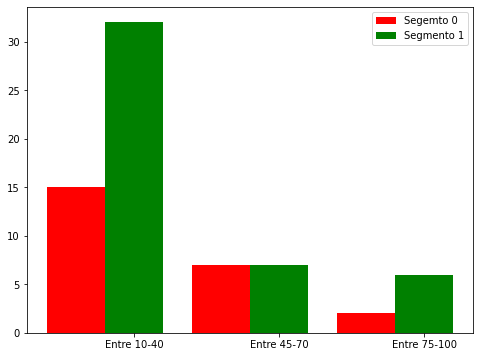

In [28]:
plot_info('DispuestoPagar')

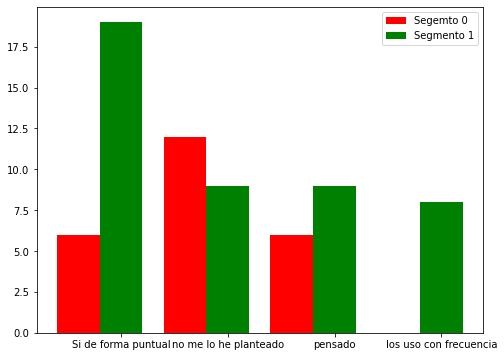

In [45]:
plot_info('coaching')